## Assignment 4

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [1]:
#your work here
import pandas
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.formula.api as sm

In [2]:
set1_df = pandas.read_csv('Assignment4_Set_1.csv')
set2_df = pandas.read_csv('Assignment4_Set_2.csv')
set3_df = pandas.read_csv('Assignment4_Set_3.csv')
set4_df = pandas.read_csv('Assignment4_Set_4.csv')
set5_df = pandas.read_csv('Assignment4_Set_5.csv')
set6_df = pandas.read_csv('Assignment4_Set_6.csv')


In [3]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

# Set 1

In [4]:
set1_df.head()


,y,x,Unnamed: 2
0,38.858144,7.266278,NaN
1,40.891148,7.985333,NaN
2,48.971648,9.387120,NaN
3,46.410124,9.382849,NaN
4,25.333391,5.240903,NaN


In [5]:
# correlation matrix
set1_df.corr(method = 'pearson')


,y,x,Unnamed: 2
y,1.000000,0.989468,NaN
x,0.989468,1.000000,NaN
Unnamed: 2,NaN,NaN,NaN


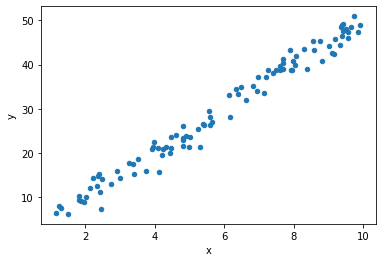

In [6]:
ax1 = set1_df.plot.scatter(x='x', y='y')

In [7]:
x_mean = set1_df['x'].mean()
y_mean = set1_df['y'].mean()



In [8]:
# Calculate the standard deviations of x, y

sig_x = np.std(set1_df['x'], ddof=1)
sig_y = np.std(set1_df['y'], ddof=1 )

print(sig_x, sig_y)

2.617712384326418 13.186232166509862


## Homemade OLS Model

In [9]:
top = 0
bottom = 0
for x, y in zip(set1_df['x'], set1_df['y']):
    top += (x - x_mean)*(y - y_mean)
    bottom += (x - x_mean)**2

m = top/bottom
b = y_mean - m * x_mean 

set1_df['lg'] = m * set1_df['x'] + b

print("M  = {:.4f}".format(m))
print("b  = {:.4f}".format(b))

M  = 4.9843
b  = 0.2381


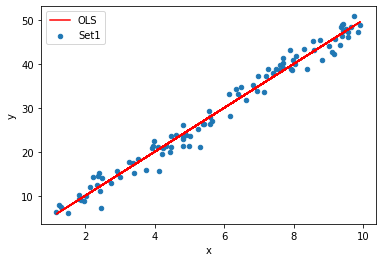

In [10]:
ax1 = set1_df.plot.scatter(x='x', y='y')
set1_df.plot.line(x='x', y='lg', ax=ax1, color = 'r')
ax1.legend(["OLS", "Set1"]);

count    1.000000e+02
mean     4.165557e-15
std      1.908727e+00
min     -3.763343e+00
25%     -1.472735e+00
50%     -2.630865e-01
75%      1.133296e+00
max      5.254912e+00
Name: y_residuals, dtype: float64

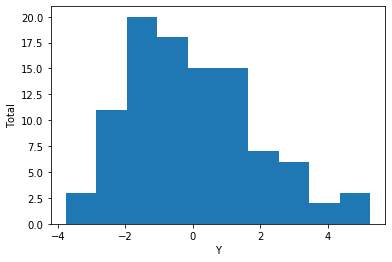

In [11]:
set1_df['y_residuals'] = set1_df['lg'] - set1_df['y']
residuals_hist = plt.hist(set1_df.y_residuals)

plt.xlabel('Y')
plt.ylabel('Total')

set1_df['y_residuals'].describe()

In [12]:
e2_sum = 0
for e in set1_df['y_residuals']:
    e2_sum += e**2

RMSE = np.sqrt(1/len(set1_df['y_residuals']) * e2_sum)

NRMSE = RMSE / y_mean
    
print("RMSE  = {:.4f}".format(RMSE))
print("NRMSE  = {:.4f}".format(NRMSE))

RMSE  = 1.8992
NRMSE  = 0.0651


In [13]:
SS_res = 0
SS_tot = 0
for y, lg in zip(set1_df['y'], set1_df['lg']):
    SS_res += (y - lg)**2
    SS_tot += (y - y_mean)**2
    
r_squared = 1 - SS_res/SS_tot

print("R2 = {:.4f}".format(r_squared))

R2 = 0.9790


## Storebought OLS Model

In [14]:
m = sm.ols('y ~ x', data = set1_df)
m = m.fit()
m.params

Intercept    0.238070
x            4.984259
dtype: float64

In [15]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           4.47e-84
Time:                        10:42:38   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Same Result! Sweet

# Set 2

In [16]:
set2_df = set2_df.iloc[:,[0,1]]
set2_df.head()

,y,x
0,28.045621,4.299210
1,39.148284,4.528143
2,17.361044,3.284988
3,18.413561,5.709732
4,7.857464,3.242708


In [17]:
# correlation matrix
set2_df.corr(method = 'pearson')

,y,x
y,1.000000,0.745168
x,0.745168,1.000000


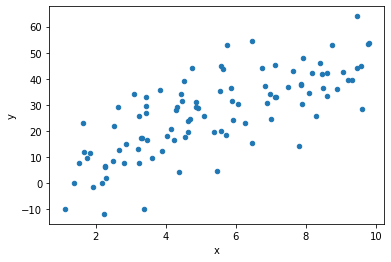

In [18]:
ax2 = set2_df.plot.scatter(x='x', y='y')

In [19]:
# Calculate the standard deviations of x, y

sig_x = np.std(set2_df['x'], ddof=1)
sig_y = np.std(set2_df['y'], ddof=1 )

print(sig_x, sig_y)

2.4364560000884308 15.620389615377615


In [20]:
x_mean = set2_df['x'].mean()
y_mean = set2_df['y'].mean()

In [21]:
top = 0
bottom = 0
for x, y in zip(set2_df['x'], set2_df['y']):
    top += (x - x_mean)*(y - y_mean)
    bottom += (x - x_mean)**2

m = top/bottom
b = y_mean - m * x_mean 

set2_df['lg'] = m * set2_df['x'] + b

print("M  = {:.4f}".format(m))
print("b  = {:.4f}".format(b))

M  = 4.7774
b  = 1.0956


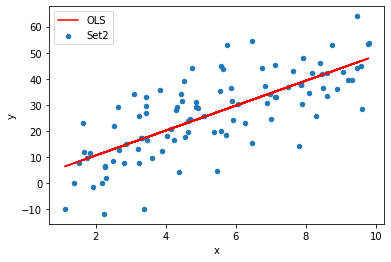

In [22]:
ax1 = set2_df.plot.scatter(x='x', y='y')
set2_df.plot.line(x='x', y='lg', ax=ax1, color = 'r')
ax1.legend(["OLS", "Set2"]);

count    1.000000e+02
mean     3.552714e-17
std      1.041688e+01
min     -2.427189e+01
25%     -6.825796e+00
50%      3.255999e-01
75%      6.370633e+00
max      2.713100e+01
Name: y_residuals, dtype: float64

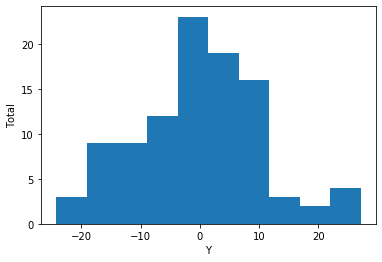

In [23]:
set2_df['y_residuals'] = set2_df['lg'] - set2_df['y']
residuals_hist = plt.hist(set2_df.y_residuals)

plt.xlabel('Y')
plt.ylabel('Total')

set2_df['y_residuals'].describe()

In [24]:
e2_sum = 0
for e in set2_df['y_residuals']:
    e2_sum += e**2

RMSE = np.sqrt(1/len(set2_df['y_residuals']) * e2_sum)

NRMSE = RMSE / y_mean
    
print("RMSE  = {:.4f}".format(RMSE))
print("NRMSE  = {:.4f}".format(NRMSE))

RMSE  = 10.3647
NRMSE  = 0.3871


In [25]:
SS_res = 0
SS_tot = 0
for y, lg in zip(set2_df['y'], set2_df['lg']):
    SS_res += (y - lg)**2
    SS_tot += (y - y_mean)**2
    
r_squared = 1 - SS_res/SS_tot

print("R2 = {:.4f}".format(r_squared))

R2 = 0.5553


In [26]:
m = sm.ols('y ~ x', data = set2_df)
m = m.fit()
m.params

Intercept    1.095552
x            4.777354
dtype: float64

In [27]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           6.11e-19
Time:                        10:42:39   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Set 3

In [28]:
set3_df.head()

,Y,x
0,6428.915770,9.517
1,2640.000728,5.113
2,12858.599270,9.773
3,5491.450053,8.428
4,2838.820108,5.752


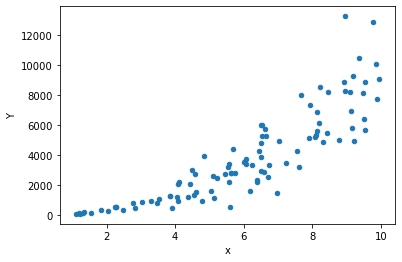

In [29]:
ax3 = set3_df.plot.scatter(x='x', y='Y')

In [30]:
# correlation matrix
set3_df.corr(method = 'pearson')

,Y,x
Y,1.000000,0.869031
x,0.869031,1.000000


In [31]:
set3_df['y_sr'] = set3_df['Y']**(1/2)

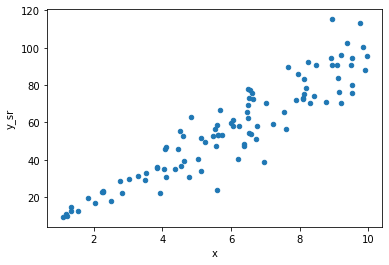

In [32]:
ax3 = set3_df.plot.scatter(x='x', y='y_sr')

In [33]:
# correlation matrix
set3_df.corr(method = 'pearson')

,Y,x,y_sr
Y,1.000000,0.869031,0.970819
x,0.869031,1.000000,0.925824
y_sr,0.970819,0.925824,1.000000


In [40]:
# Calculate the standard deviations of x, y

sig_x = np.std(set3_df['x'], ddof=1)
sig_y = np.std(set3_df['Y'], ddof=1 )
sig_y_sr = np.std(set3_df['y_sr'], ddof=1 )

print(sig_x, sig_y, sig_y_sr)

2.4440581076223094 3042.522716399385 25.833952350924456


In [ ]:
x_mean = set3_df['x'].mean()
y_mean = set3_df['Y'].mean()
y_sr_mean = set3_df['y_sr'].mean()


In [41]:
top = 0
bottom = 0
for x, y in zip(set3_df['x'], set3_df['Y']):
    top += (x - x_mean)*(y - y_mean)
    bottom += (x - x_mean)**2

m = top/bottom
b = y_mean - m * x_mean 

set3_df['lg'] = m * set3_df['x'] + b

print("M  = {:.4f}".format(m))
print("b  = {:.4f}".format(b))

M  = 1393.8560
b  = -7465.4580


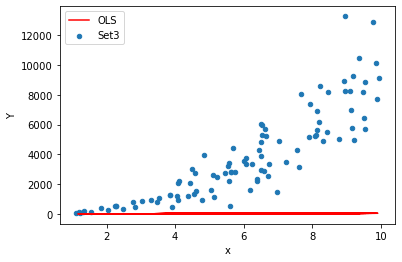

In [43]:
ax1 = set3_df.plot.scatter(x='x', y='Y')
set1_df.plot.line(x='x', y='lg', ax=ax1, color = 'r')
ax1.legend(["OLS", "Set3"]);

In [ ]:
e2_sum = 0
for e in set1_df['y_residuals']:
    e2_sum += e**2

RMSE = np.sqrt(1/len(set1_df['y_residuals']) * e2_sum)

NRMSE = RMSE / y_mean
    
print("RMSE  = {:.4f}".format(RMSE))
print("NRMSE  = {:.4f}".format(NRMSE))

In [ ]:
m = sm.ols('y ~ x', data = set2_df)
m = m.fit()
m.params

In [ ]:
m.summary()

# Set 4

In [34]:
set4_df.head()

,Y,x
0,1.887192e+05,5.9947
1,7.107264e+03,3.9492
2,3.729064e+06,9.6353
3,5.691779e+02,0.4943
4,3.022130e+06,9.0811


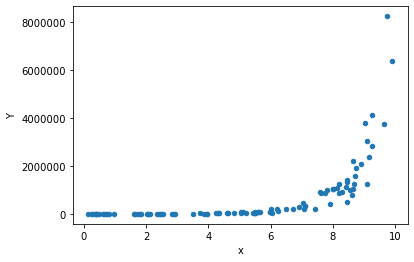

In [35]:
ax4 = set4_df.plot.scatter(x='x', y='Y')

In [ ]:
# Calculate the standard deviations of x, y

sig_x = np.std(set2_df['x'], ddof=1)
sig_y = np.std(set2_df['y'], ddof=1 )

print(sig_x, sig_y)

In [ ]:
x_mean = set1_df['x'].mean()
y_mean = set1_df['y'].mean()


In [ ]:
top = 0
bottom = 0
for x, y in zip(set2_df['x'], set2_df['y']):
    top += (x - x_mean)*(y - y_mean)
    bottom += (x - x_mean)**2

m = top/bottom
b = y_mean - m * x_mean 

set2_df['lg'] = m * set2_df['x'] + b

print("M  = {:.4f}".format(m))
print("b  = {:.4f}".format(b))

In [ ]:
ax1 = set1_df.plot.scatter(x='x', y='y')
set1_df.plot.line(x='x', y='lg', ax=ax1, color = 'r')
ax1.legend(["OLS", "Set1"]);

In [ ]:
set1_df['y_residuals'] = set1_df['lg'] - set1_df['y']
residuals_hist = plt.hist(set1_df.y_residuals)

plt.xlabel('Y')
plt.ylabel('Total')

set1_df['y_residuals'].describe()

In [ ]:
e2_sum = 0
for e in set1_df['y_residuals']:
    e2_sum += e**2

RMSE = np.sqrt(1/len(set1_df['y_residuals']) * e2_sum)

NRMSE = RMSE / y_mean
    
print("RMSE  = {:.4f}".format(RMSE))
print("NRMSE  = {:.4f}".format(NRMSE))

In [ ]:
m = sm.ols('y ~ x', data = set2_df)
m = m.fit()
m.params

In [ ]:
m.summary()

# Set 5

In [36]:
set5_df.head()

,Y,X
0,47.320319,9.0527
1,39.862491,7.3135
2,42.225779,8.6471
3,30.010689,5.8579
4,43.900459,7.9357


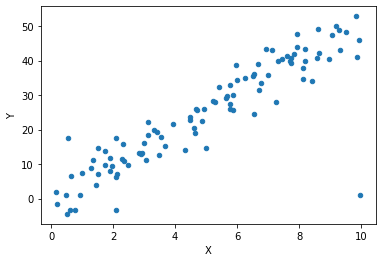

In [37]:
ax5 = set5_df.plot.scatter(x='X', y='Y')

In [ ]:
# Calculate the standard deviations of x, y

sig_x = np.std(set2_df['x'], ddof=1)
sig_y = np.std(set2_df['y'], ddof=1 )

print(sig_x, sig_y)

In [ ]:
x_mean = set1_df['x'].mean()
y_mean = set1_df['y'].mean()


In [ ]:
top = 0
bottom = 0
for x, y in zip(set2_df['x'], set2_df['y']):
    top += (x - x_mean)*(y - y_mean)
    bottom += (x - x_mean)**2

m = top/bottom
b = y_mean - m * x_mean 

set2_df['lg'] = m * set2_df['x'] + b

print("M  = {:.4f}".format(m))
print("b  = {:.4f}".format(b))

In [ ]:
ax1 = set1_df.plot.scatter(x='x', y='y')
set1_df.plot.line(x='x', y='lg', ax=ax1, color = 'r')
ax1.legend(["OLS", "Set1"]);

In [ ]:
set1_df['y_residuals'] = set1_df['lg'] - set1_df['y']
residuals_hist = plt.hist(set1_df.y_residuals)

plt.xlabel('Y')
plt.ylabel('Total')

set1_df['y_residuals'].describe()

In [ ]:
e2_sum = 0
for e in set1_df['y_residuals']:
    e2_sum += e**2

RMSE = np.sqrt(1/len(set1_df['y_residuals']) * e2_sum)

NRMSE = RMSE / y_mean
    
print("RMSE  = {:.4f}".format(RMSE))
print("NRMSE  = {:.4f}".format(NRMSE))

In [ ]:
m = sm.ols('y ~ x', data = set2_df)
m = m.fit()
m.params

In [ ]:
m.summary()

# Set 6

In [38]:
set6_df.head()

,y,x
0,-2.76,1.1290
1,61.07,6.9100
2,52.85,7.8374
3,-2.88,0.1335
4,59.05,9.2425


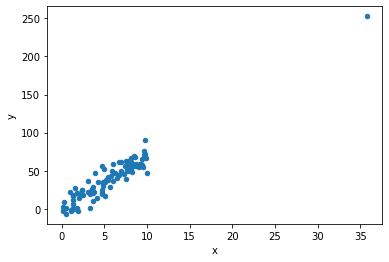

In [39]:
ax6 = set6_df.plot.scatter(x='x', y='y')

In [ ]:
# Calculate the standard deviations of x, y

sig_x = np.std(set2_df['x'], ddof=1)
sig_y = np.std(set2_df['y'], ddof=1 )

print(sig_x, sig_y)

In [ ]:
top = 0
bottom = 0
for x, y in zip(set2_df['x'], set2_df['y']):
    top += (x - x_mean)*(y - y_mean)
    bottom += (x - x_mean)**2

m = top/bottom
b = y_mean - m * x_mean 

set2_df['lg'] = m * set2_df['x'] + b

print("M  = {:.4f}".format(m))
print("b  = {:.4f}".format(b))

In [ ]:
ax1 = set1_df.plot.scatter(x='x', y='y')
set1_df.plot.line(x='x', y='lg', ax=ax1, color = 'r')
ax1.legend(["OLS", "Set1"]);

In [ ]:
set1_df['y_residuals'] = set1_df['lg'] - set1_df['y']
residuals_hist = plt.hist(set1_df.y_residuals)

plt.xlabel('Y')
plt.ylabel('Total')

set1_df['y_residuals'].describe()

In [ ]:
e2_sum = 0
for e in set1_df['y_residuals']:
    e2_sum += e**2

RMSE = np.sqrt(1/len(set1_df['y_residuals']) * e2_sum)

NRMSE = RMSE / y_mean
    
print("RMSE  = {:.4f}".format(RMSE))
print("NRMSE  = {:.4f}".format(NRMSE))

In [ ]:
m = sm.ols('y ~ x', data = set2_df)
m = m.fit()
m.params

In [ ]:
m.summary()